In [36]:
# Loading Data and making copy just in case

import pandas as pd

df = pd.read_csv("C:/Users/max dore/Desktop/Data3402 kaggle challenge (churn)/test.csv")
df2 = pd.read_csv("C:/Users/max dore/Desktop/Data3402 kaggle challenge (churn)/train.csv")
dftest = df.copy()

In [37]:
# DROPPING the "Surname" feature. It is not very relevant to predicting churn. (USED)

dftest = dftest.drop(columns=['Surname'])

# Dropping CustomerID as well from the data frame. seems like an extension of ID and not very useful to the overall model
# (USED)

dftest = dftest.drop(columns=['CustomerId'])

#-------------------------------------------------------------------------------

#TRAIN
# DROPPING the "Surname" feature. It is not very relevant to predicting churn. (USED)

df2 = df2.drop(columns=['Surname'])

# Dropping CustomerID as well from the data frame. seems like an extension of ID and not very useful to the overall model
# (USED)

df2 = df2.drop(columns=['CustomerId'])

In [38]:
#Applying one-hot coding to gender

import pandas as pd

dftest = pd.get_dummies(dftest, columns=['Gender'], prefix='Gen')

#--------------------------------------------------------------------

#TRAIN
import pandas as pd

df2 = pd.get_dummies(df2, columns=['Gender'], prefix='Gen')

In [39]:
#changing bool dtype to float (not sure why it changed to bool) for Gen

for column in dftest.columns:
    if column.startswith('Gen_'):
        dftest[column] = dftest[column].astype(float)

#----------------------------------------------------------------

#TRAIN
#changing bool dtype to float (not sure why it changed to bool) for Gen

for column in df2.columns:
    if column.startswith('Gen_'):
        df2[column] = df2[column].astype(float)

In [40]:
#Applying one-hot coding to Geography (also have to change dtype to float from bool)

import pandas as pd


dftest = pd.get_dummies(dftest, columns=['Geography'], prefix='Geo')

for column in dftest.columns:
    if column.startswith('Geo_'):
        dftest[column] = dftest[column].astype(float)

#-------------------------------------------------------------------------------------------

#TRAIN
#Applying one-hot coding to Geography (also have to change dtype to float from bool)

import pandas as pd


df2 = pd.get_dummies(df2, columns=['Geography'], prefix='Geo')

for column in dftest.columns:
    if column.startswith('Geo_'):
        df2[column] = df2[column].astype(float)

In [41]:
#Standardizing the numerical columns that aren't encoded

from sklearn.preprocessing import StandardScaler

# 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'
columns_to_standardize = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()

dftest[columns_to_standardize] = scaler.fit_transform(dftest[columns_to_standardize])

#--------------------------------------------------------------------------------------------

#TRAIN
#Standardizing the numerical columns that aren't encoded

from sklearn.preprocessing import StandardScaler

# 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'
columns_to_standardize = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()

df2[columns_to_standardize] = scaler.fit_transform(df2[columns_to_standardize])

In [42]:
dftest.head()

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gen_Female,Gen_Male,Geo_France,Geo_Germany,Geo_Spain
0,165034,-0.878176,-1.706504,-1.067887,-0.881274,0.820030,0.0,1.0,0.967874,1.0,0.0,1.0,0.0,0.0
1,165035,0.329567,0.888990,-1.067887,-0.881274,-1.015806,1.0,0.0,-0.790939,1.0,0.0,1.0,0.0,0.0
2,165036,-0.006609,-0.465181,0.713922,-0.881274,0.820030,1.0,0.0,0.528413,1.0,0.0,1.0,0.0,0.0
3,165037,0.304665,-0.239486,1.070284,-0.881274,-1.015806,1.0,0.0,0.032150,0.0,1.0,1.0,0.0,0.0
4,165038,1.188684,-0.013791,1.783008,1.050038,-1.015806,1.0,0.0,0.539331,0.0,1.0,0.0,1.0,0.0


In [43]:
df2.head()

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gen_Female,Gen_Male,Geo_France,Geo_Germany,Geo_Spain
0,0,0.144135,-0.578074,-0.719973,-0.883163,0.814298,1.0,0.0,1.369486,0,0.0,1.0,1.0,0.0,0.0
1,1,-0.367706,-0.578074,-1.432694,-0.883163,0.814298,1.0,1.0,-1.254085,0,0.0,1.0,1.0,0.0,0.0
2,2,0.268974,0.211354,1.774548,-0.883163,0.814298,1.0,0.0,1.437422,0,0.0,1.0,1.0,0.0,0.0
3,3,-0.941966,-0.465299,-1.076334,1.486918,-1.013348,1.0,1.0,-0.557018,0,0.0,1.0,1.0,0.0,0.0
4,4,0.743362,-0.578074,-0.007253,-0.883163,0.814298,1.0,1.0,-1.938770,0,0.0,1.0,0.0,0.0,1.0


# Training

Results:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     39133
           1       0.74      0.56      0.64     10378

    accuracy                           0.87     49511
   macro avg       0.82      0.75      0.78     49511
weighted avg       0.86      0.87      0.86     49511

Accuracy: 0.8664741168629193
Full ROC AUC: 0.889579


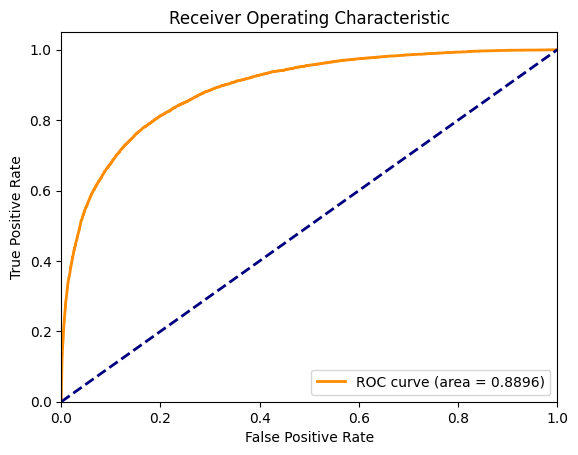

In [44]:
# Final Bayesian Model with full ROC number

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

X = df2.drop(['Exited', 'id'], axis=1)
y = df2['Exited']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Best parameters
best_params = {
    'learning_rate': 0.13,
    'max_depth': 4,
    'n_estimators': 89,
    'use_label_encoder': False,
    'eval_metric': 'logloss',
    'random_state': 42
}

model = xgb.XGBClassifier(**best_params)

model.fit(X_train, y_train)

y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]

# Evaluation
print("Results:")
print(classification_report(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))

# ROC and Graph
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"Full ROC AUC: {roc_auc:.6f}")  # Adjust the number 6 to change the number of decimal places

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')  # 4 decimal places in the label
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Test

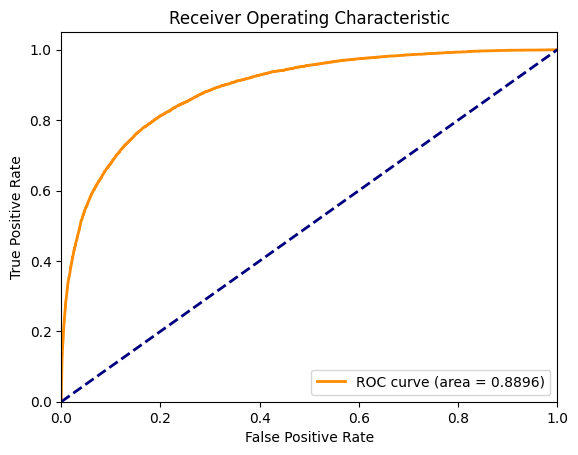

ROC AUC: 0.889579
Submission file created successfully with 110023 entries.


In [45]:
#Final Test and submission file creation

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

X_test = dftest.drop(['id'], axis=1)
test_predictions = model.predict_proba(X_test)[:, 1]

y_pred_proba_val = model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_val)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print(f"ROC AUC: {roc_auc:.6f}")

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'id': dftest['id'],  # make sure this column matches the identifier in the competition's submission format
    'Exited': test_predictions 
})

submission_df.to_csv('final_submission.csv', index=False)
print("Submission file created successfully with {} entries.".format(len(submission_df)))

